<a href="https://colab.research.google.com/github/nahidsami/nahidsami/blob/main/CNN_classifier_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
print("Tensorflow version", tf.__version__)
from tensorflow import keras
print("Keras version", keras)
import matplotlib.pyplot as plt
np.random.seed(42) 
tf.random.set_seed(42)

Tensorflow version 2.8.0
Keras version <module 'keras.api._v2.keras' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/__init__.py'>


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

item0 9
Train data shape: (55000, 28, 28)
Validation data shape: (5000, 28, 28)
Test data shape: (10000, 28, 28)


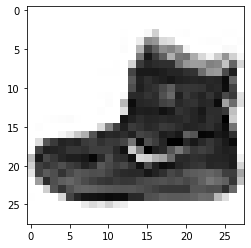

In [ ]:
plt.imshow(X_train_full[0], cmap="Greys")
print ("item0", y_train_full[0])
X_train = X_train_full[:55000]
y_train = y_train_full[:55000]
X_valid = X_train_full[55000:]
y_valid = y_train_full[55000:]
print("Train data shape:",X_train.shape)
print("Validation data shape:",X_valid.shape)
print("Test data shape:",X_test.shape)

In [ ]:
import numpy as np
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True)
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]
print ("Shape of features", X_train.shape, X_valid.shape, X_test.shape)

Shape of features (55000, 28, 28, 1) (5000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                    kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]), #Based on input size
    keras.layers.MaxPooling2D(pool_size=2), #Same maxpooling applied regularly
    DefaultConv2D(filters=128),  
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))

Epoch 1/3
1719/1719 [==============================] - 766s 445ms/step - loss: 0.8811 - accuracy: 0.6879 - val_loss: 0.3994 - val_accuracy: 0.8638
Epoch 2/3
1719/1719 [==============================] - 764s 444ms/step - loss: 0.4948 - accuracy: 0.8300 - val_loss: 0.4111 - val_accuracy: 0.8430
Epoch 3/3
1719/1719 [==============================] - 765s 445ms/step - loss: 0.4373 - accuracy: 0.8501 - val_loss: 0.3390 - val_accuracy: 0.8722


In [ ]:
results = model.evaluate(X_test, y_test)
print(results[1])

X_new = X_test[10:20]
y_pred = model.predict(X_new)

print(np.argmax(y_pred, axis=1))
print (y_test[10:20])

313/313 [==============================] - 44s 142ms/step - loss: 0.3717 - accuracy: 0.8665
0.8665000200271606
[4 5 5 3 4 1 2 6 8 0]
[4 5 7 3 4 1 2 4 8 0]


# Noise Removal from images


In [ ]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', cache=True)

mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)

X, y = mnist["data"], mnist["target"]
X.shape
y.shape

KeyError: ignored